## Problem Statement

![](https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/cover_1_CTBt1pB-thumbnail-1200x1200-90.jpg)

**The Toxic Pesticides**

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

**Data Description**

| **Variable**  | **Definition** |
| --- | --- |
| ID | UniqueID |
| Estimated_Insects_Count |  Estimated insects count per square meter |
| Crop_Type | Category of Crop(0,1) |
| Soil_Type | Category of Soil (0,1) |
| Pesticide_Use_Category | Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using) |
| Number_Doses_Week | Number of doses per week |
| Number_Weeks_Used | Number of weeks used |
| Number_Weeks_Quit | Number of weeks quit |
| Season | Season Category (1,2,3) |
| Crop_Damage | Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides) |

**Evaluation Metric**

The evaluation metric for this hackathon is Accuracy Score.


In [248]:
## Import necessary Libraries.

import pandas as pd ## Pandas Library (will use to load data,create data frame...etc).
import numpy as np ## Numpy Library ( will use to convert data frame to array or creating array etc...).
import os ## For connecting to machine to get path for reading/writing files.
from sklearn.model_selection import train_test_split ## For splitting data into train and validation.
from sklearn.impute import SimpleImputer ## For imputing NA values.
from sklearn.preprocessing import StandardScaler ## For scaling numeric columns.
from sklearn.tree import DecisionTreeClassifier,export_graphviz ## For decision tree model.
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report ## For metrics.
from sklearn.model_selection import  GridSearchCV ## For Grid search moel.
from sklearn.linear_model import LogisticRegression ## For Logistic model.
from sklearn.metrics import roc_curve ## For ROC curve.
from sklearn.naive_bayes import GaussianNB ## For NaiveBayes model.
from sklearn.neighbors import KNeighborsClassifier ## For KNN model.
from sklearn.ensemble import RandomForestClassifier ## For Random Forest model.
from sklearn.ensemble import BaggingClassifier ## For Bagging model.
from sklearn.ensemble import AdaBoostClassifier ## For AdaBoost model.
from sklearn.ensemble import GradientBoostingClassifier ## For GB model.
from xgboost.sklearn import XGBClassifier ## For XGB model.
from sklearn.svm import SVC ## For SVC model.
from keras.models import Sequential, Model ## For sequential model.
from keras.layers import Dense, Input ## For input,dense model.
from sklearn.linear_model import RidgeClassifier, Lasso ## For Ridge,Lasso Model.

C:\Users\nagar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Get current working directory.
os.getcwd()

'D:\\Python\\Pratice\\Machine Learning in Agriculture'

In [543]:
## Set working directory.
os.chdir("D:\DataScience\Pratice\Machine Learning in Agriculture")
os.getcwd()

'D:\\DataScience\\Pratice\\Machine Learning in Agriculture'

In [544]:
## Load data sets.
train = pd.read_csv("train.csv",header='infer',sep=',')
test = pd.read_csv('test.csv',header='infer',sep=',')

In [545]:
## Check dimensions of train and test data.
print(train.shape)
print(test.shape)

(88858, 10)
(59310, 9)


In [546]:
## Check first record of train data.
train.head(1)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0


In [547]:
## Check last record of train data.
train.tail(1)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [548]:
## Check first record of test data.
test.head(1)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2


In [549]:
## Check last record of test data.
test.head(1)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2


In [550]:
## Check summary statistics of train data.
train.describe(include='all')

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
unique,88858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00014893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,NaN,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,NaN,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000


In [551]:
## Check summary statistics of test data.
test.describe(include='all')

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
unique,59310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00032677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,NaN,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,NaN,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000


In [552]:
## Check column data types of train data.
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [553]:
## Check column data types of test data.
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [554]:
## Chek index range for train data.
train.index

RangeIndex(start=0, stop=88858, step=1)

In [555]:
## Chek index range for test data.
test.index

RangeIndex(start=0, stop=59310, step=1)

In [556]:
## Get column names of train data.
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [557]:
## Get column names of test data.
test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [558]:
## Check NA values for train data.
train.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [559]:
## Check NA values for test data.
test.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [560]:
## This method will return number of levels,null values,unique values,data types.

def observations(df):
    return(pd.DataFrame({'dtypes' : df.dtypes,
                         'levels' : [df[x].unique() for x in df.columns],
                         'null_values' : df.isnull().sum(),
                         'Unique Values': df.nunique()
                        }))

In [561]:
## Get train data statistics.
observations(train)

,dtypes,levels,null_values,Unique Values
ID,object,"[F00000001, F00000003, F00000004, F00000005, F...",0,88858
Estimated_Insects_Count,int64,"[188, 209, 257, 342, 448, 577, 731, 1132, 1212...",0,71
Crop_Type,int64,"[1, 0]",0,2
Soil_Type,int64,"[0, 1]",0,2
Pesticide_Use_Category,int64,"[1, 3, 2]",0,3
Number_Doses_Week,int64,"[0, 30, 40, 60, 20, 25, 45, 50, 15, 10, 5, 35,...",0,20
Number_Weeks_Used,float64,"[0.0, nan, 26.0, 20.0, 15.0, 14.0, 19.0, 24.0,...",9000,64
Number_Weeks_Quit,int64,"[0, 1, 9, 4, 13, 3, 14, 6, 2, 12, 15, 10, 8, 1...",0,51
Season,int64,"[1, 2, 3]",0,3
Crop_Damage,int64,"[0, 1, 2]",0,3


In [562]:
## Get train data statistics.
observations(test)

,dtypes,levels,null_values,Unique Values
ID,object,"[F00000002, F00000007, F00000011, F00000013, F...",0,59310
Estimated_Insects_Count,int64,"[188, 410, 626, 731, 789, 851, 1056, 1576, 189...",0,71
Crop_Type,int64,"[1, 0]",0,2
Soil_Type,int64,"[1, 0]",0,2
Pesticide_Use_Category,int64,"[1, 3, 2]",0,3
Number_Doses_Week,int64,"[0, 30, 40, 20, 35, 65, 5, 15, 25, 10, 60, 80,...",0,20
Number_Weeks_Used,float64,"[nan, 0.0, 20.0, 19.0, 10.0, 14.0, 22.0, 13.0,...",5893,64
Number_Weeks_Quit,int64,"[0, 2, 4, 3, 11, 6, 10, 13, 7, 12, 9, 15, 8, 1...",0,51
Season,int64,"[2, 1, 3]",0,3


In [563]:
## Below logic is used for checking special characters in numeric columns.

def specialCharcterVerification_NumCol(data):
    for col in data.select_dtypes(['int64','float64']).columns: 
        print('\n',col,'----->')
        for index in range(1,len(data)):
            try:
                skip=float(data.loc[index,col])
                skip=int(data.loc[index,col])
            except ValueError :
                if(str(data.loc[index,col]) != 'nan'):
                    print(index,data.loc[index,col])

In [564]:
## Check special charcters for train data numeric columns.
specialCharcterVerification_NumCol(train)


 Estimated_Insects_Count ----->

 Crop_Type ----->

 Soil_Type ----->

 Pesticide_Use_Category ----->

 Number_Doses_Week ----->

 Number_Weeks_Used ----->

 Number_Weeks_Quit ----->

 Season ----->

 Crop_Damage ----->


In [565]:
## Check special charcters for test data numeric columns.
specialCharcterVerification_NumCol(test)


 Estimated_Insects_Count ----->

 Crop_Type ----->

 Soil_Type ----->

 Pesticide_Use_Category ----->

 Number_Doses_Week ----->

 Number_Weeks_Used ----->

 Number_Weeks_Quit ----->

 Season ----->


In [566]:
## Check special characters for categorical columns of train data.
def specialCharcterVerification_CatCol(data):
    for col in data.select_dtypes(['category','object']).columns:
        print('\n',col,'----->')
        for index in range(1,len(data)):
            if  data.loc[index,col].isdigit() or str(data.loc[index,col]) =='nan' or data.loc[index,col].isalpha() or data.loc[index,col].isalnum():
                skip = True
            else:
                print("Index ",index,"\tSpecial Character ",data.loc[index,col]) 

In [567]:
## Check special charcters for train data category columns.
specialCharcterVerification_CatCol(train)


 ID ----->


In [568]:
## Check special charcters for test data category columns.
specialCharcterVerification_CatCol(test)


 ID ----->


In [569]:
## calculate variance column wise.
def variance(x):
        return(pd.DataFrame({'Datatype' : x.dtypes,
                            'Variance': [round(x[i].var()) for i in x] }))

In [570]:
## Get variance for train data numeric columns.
variance(train.select_dtypes(['int64','float64']))

,Datatype,Variance
Estimated_Insects_Count,int64,720884
Crop_Type,int64,0
Soil_Type,int64,0
Pesticide_Use_Category,int64,0
Number_Doses_Week,int64,242
Number_Weeks_Used,float64,154
Number_Weeks_Quit,int64,98
Season,int64,0
Crop_Damage,int64,0


In [571]:
## Get variance for test data numeric columns.
variance(test.select_dtypes(['int64','float64']))

,Datatype,Variance
Estimated_Insects_Count,int64,721524
Crop_Type,int64,0
Soil_Type,int64,0
Pesticide_Use_Category,int64,0
Number_Doses_Week,int64,240
Number_Weeks_Used,float64,154
Number_Weeks_Quit,int64,97
Season,int64,0


In [572]:
## Check for corrlation between numeric columns of train data.
train[train.select_dtypes(['int64','float64']).columns].corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.232192
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.232192,-0.133117,-0.000184,1.000000


In [573]:
## Check for corrlation between numeric columns of test data.
test[test.select_dtypes(['int64','float64']).columns].corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,-0.092645,-0.056395,-0.085671,-0.103554,0.437127,0.300151,-0.006288
Crop_Type,-0.092645,1.000000,-0.292243,0.231684,-0.189827,-0.044664,-0.235283,0.002850
Soil_Type,-0.056395,-0.292243,1.000000,0.036276,0.078851,-0.066028,0.008656,-0.003056
Pesticide_Use_Category,-0.085671,0.231684,0.036276,1.000000,0.004707,0.344605,-0.551182,-0.004395
Number_Doses_Week,-0.103554,-0.189827,0.078851,0.004707,1.000000,0.127386,-0.040878,0.001580
Number_Weeks_Used,0.437127,-0.044664,-0.066028,0.344605,0.127386,1.000000,-0.445626,-0.003330
Number_Weeks_Quit,0.300151,-0.235283,0.008656,-0.551182,-0.040878,-0.445626,1.000000,0.003223
Season,-0.006288,0.002850,-0.003056,-0.004395,0.001580,-0.003330,0.003223,1.000000


In [574]:
## Get missing percentage of Na values
def missingValuesPercentage(Data):
    missing_values = (Data.isna().sum() /len(Data)).round(4) * 100 
    print(missing_values.sort_values(ascending = False))

In [575]:
## Get NA values count in percentage for train data.
missingValuesPercentage(train)

Number_Weeks_Used          10.13
Crop_Damage                 0.00
Season                      0.00
Number_Weeks_Quit           0.00
Number_Doses_Week           0.00
Pesticide_Use_Category      0.00
Soil_Type                   0.00
Crop_Type                   0.00
Estimated_Insects_Count     0.00
ID                          0.00
dtype: float64


In [576]:
## Get NA values count in percentage for test data.
missingValuesPercentage(test)

Number_Weeks_Used          9.94
Season                     0.00
Number_Weeks_Quit          0.00
Number_Doses_Week          0.00
Pesticide_Use_Category     0.00
Soil_Type                  0.00
Crop_Type                  0.00
Estimated_Insects_Count    0.00
ID                         0.00
dtype: float64


In [577]:
## Impute NA values for train data.
train.fillna(value=0,inplace=True)

In [578]:
## Impute NA values for test data.
test.fillna(value=0,inplace=True)

In [579]:
## Check NA values after imputation for train data.
train.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [580]:
## Check NA values after imputation for test data.
test.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [581]:
## Convert float data type to int for train data.
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].astype('int64')

In [582]:
## Convert float data type to int for test data.
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].astype('int64')

In [583]:
## Data type conversion(from numeric to category)
def dataTypeConversion(cols,data):
    for col in cols:
        data[col] = data[col].astype(str).astype('category')
    return data

In [584]:
## Convert numeric columns into categrogy columns for train data.
cat_columns = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season','Crop_Damage']
train = dataTypeConversion(cat_columns,train)

In [585]:
## Convert numeric columns into categrogy columns for test data.
cat_columns = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
test = dataTypeConversion(cat_columns,test)

In [586]:
## Check observation for train data after preprocessing.
observations(train)

,dtypes,levels,null_values,Unique Values
ID,object,"[F00000001, F00000003, F00000004, F00000005, F...",0,88858
Estimated_Insects_Count,int64,"[188, 209, 257, 342, 448, 577, 731, 1132, 1212...",0,71
Crop_Type,category,"[1, 0] Categories (2, object): [1, 0]",0,2
Soil_Type,category,"[0, 1] Categories (2, object): [0, 1]",0,2
Pesticide_Use_Category,category,"[1, 3, 2] Categories (3, object): [1, 3, 2]",0,3
Number_Doses_Week,int64,"[0, 30, 40, 60, 20, 25, 45, 50, 15, 10, 5, 35,...",0,20
Number_Weeks_Used,int64,"[0, 26, 20, 15, 14, 19, 24, 8, 23, 25, 28, 29,...",0,64
Number_Weeks_Quit,int64,"[0, 1, 9, 4, 13, 3, 14, 6, 2, 12, 15, 10, 8, 1...",0,51
Season,category,"[1, 2, 3] Categories (3, object): [1, 2, 3]",0,3
Crop_Damage,category,"[0, 1, 2] Categories (3, object): [0, 1, 2]",0,3


In [587]:
## Check observation for test data after preprocessing.
observations(test)

,dtypes,levels,null_values,Unique Values
ID,object,"[F00000002, F00000007, F00000011, F00000013, F...",0,59310
Estimated_Insects_Count,int64,"[188, 410, 626, 731, 789, 851, 1056, 1576, 189...",0,71
Crop_Type,category,"[1, 0] Categories (2, object): [1, 0]",0,2
Soil_Type,category,"[1, 0] Categories (2, object): [1, 0]",0,2
Pesticide_Use_Category,category,"[1, 3, 2] Categories (3, object): [1, 3, 2]",0,3
Number_Doses_Week,int64,"[0, 30, 40, 20, 35, 65, 5, 15, 25, 10, 60, 80,...",0,20
Number_Weeks_Used,int64,"[0, 20, 19, 10, 14, 22, 13, 26, 17, 15, 25, 18...",0,64
Number_Weeks_Quit,int64,"[0, 2, 4, 3, 11, 6, 10, 13, 7, 12, 9, 15, 8, 1...",0,51
Season,category,"[2, 1, 3] Categories (3, object): [2, 1, 3]",0,3


In [588]:
## Set ID as index to train and test.
train.set_index('ID',inplace=True)
test.set_index('ID',inplace=True)

In [589]:
## Check first record of train data after setting index.
train.head(1)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00000001,188,1,0,1,0,0,0,1,0


In [590]:
## Check first record of test data after setting index.
test.head(1)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
ID,,,,,,,,
F00000002,188,1,1,1,0,0,0,2


In [591]:
## Store train data features into train_data.
train_data = train.drop('Crop_Damage', axis=1)

In [592]:
## Store train data Crop_Damage column into y.
y = train['Crop_Damage']

In [593]:
## Split the train data into  train and validation(80:20).
X_train,X_test,y_train,y_test = train_test_split(train_data,y,test_size=0.2,random_state =1234)

In [594]:
## Do label encoding(For converting category column values into numeric values).

le_crop_type = LabelEncoder()
le_soil_type = LabelEncoder()
le_pesticide_use_cat = LabelEncoder()
le_season = LabelEncoder()
le_crop_damage = LabelEncoder()

In [595]:
## Do label encoding for trian data. 
X_train['Crop_Type'] = le_crop_type.fit_transform(X_train['Crop_Type'])
X_train['Soil_Type'] = le_soil_type.fit_transform(X_train['Soil_Type'])
X_train['Pesticide_Use_Category'] = le_pesticide_use_cat.fit_transform(X_train['Pesticide_Use_Category'])
X_train['Season'] = le_season.fit_transform(X_train['Season'])

y_train = le_crop_damage.fit_transform(y_train)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [596]:
## Do label encoding for validation data. 
X_test['Crop_Type'] = le_crop_type.transform(X_test['Crop_Type'])
X_test['Soil_Type'] = le_soil_type.transform(X_test['Soil_Type'])
X_test['Pesticide_Use_Category'] = le_pesticide_use_cat.transform(X_test['Pesticide_Use_Category'])
X_test['Season'] = le_season.fit_transform(X_test['Season'])

y_test = le_crop_damage.transform(y_test)

C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [597]:
## Do label encoding for test data. 
test['Crop_Type'] = le_crop_type.transform(test['Crop_Type'])
test['Soil_Type'] = le_soil_type.transform(test['Soil_Type'])
test['Pesticide_Use_Category'] = le_pesticide_use_cat.transform(test['Pesticide_Use_Category'])
test['Season'] = le_season.fit_transform(test['Season'])

In [598]:
########################################## Build Different Models #############################################################

In [599]:
########################################## XGB Classifier #####################################################################

In [600]:
## Model Building with Grid Search.
xgb = XGBClassifier() ## Instantiate XGBClassifier model.

optimization_dict = {'max_depth': [2,3,4,5,6,7,10,15], ## trying with different max_depth,n_estimators to find best model.
                      'n_estimators': [50,60,70,80,90,100,150,200]} 

## Build best model with Grid Search params.
model = GridSearchCV(xgb, ## XGB model.
                     optimization_dict, ## dictory with different max_depth,n_estimators.
                     scoring='accuracy', ## on which parameter we are interested.
                     verbose=1, ## for messaging purpose.
                     n_jobs=-1) ## Number of jobs to run in parallel. ''-1' means use all processors.

%time model.fit(X_train, y_train) ## Fit a model.
print(model.best_score_) ## Display best score calues.
print(model.best_params_) ## Display best parameters.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 23.7min finished


Wall time: 24min 40s
0.8473679331612345
{'max_depth': 5, 'n_estimators': 200}


In [866]:
## Fit a model with best params which we found after grid search CV (above code).
model = XGBClassifier(max_depth=10,          ## Depth of the tree.
                      n_estimators=200,      ## Number of trees.
                      learning_rate = 0.001, ## Learning rate.
                      booster ='gbtree',     ## Booster type.
                      random_state=1234)     ## Seed value.
%time model.fit(X_train, y_train)

Wall time: 2min 1s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [867]:
## Get the predictions on train data.
train_pred = model.predict(X_train)

In [868]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.8516866893621811


In [869]:
## Get the predictions on validation data.
validation_pred = model.predict(X_test)

In [870]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,validation_pred))

Validation Accuracy : 0.8402543326581139


In [871]:
## Get the confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[58435   968     5]
 [ 7793  2059    12]
 [ 1286   479    49]]


In [872]:
## Get the confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, validation_pred)
print(confusion_matrix_test)

[[14511   315     4]
 [ 2017   419     7]
 [  349   147     3]]


In [873]:
## Copy test data into temp.
temp = test.copy()

In [874]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [875]:
## Display prediction values.
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [876]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [877]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [878]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [880]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    56337
1     2896
2       77
Name: Crop_Damage, dtype: int64

In [615]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [616]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [617]:
## Store to_submit data into a csv file with name xgbmodel_predictions. 
to_submit.to_csv('xgbmodel_predictions.csv',index = False)

In [618]:
################################################## Decision Tree ###############################################################

In [619]:
## Instantiate decision tree and  fit a model.
clf = DecisionTreeClassifier(max_depth=8) ##  Depth of the tree.
clf = clf.fit(X_train, y_train)

In [620]:
## Get GraphViz path.
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [621]:
## Import Graphic libraries.
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

In [622]:
## Plot the tree hierarchy.
def plottree(m1):
    labels=X_train.columns
    graph = Source(export_graphviz(m1, out_file=None,feature_names=labels, class_names=['0', '1','2'] ,filled = True))
    display(SVG(graph.pipe(format='svg')))

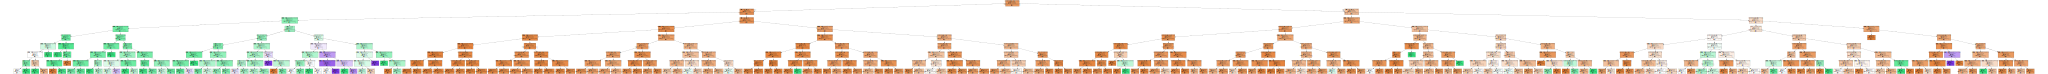

In [623]:
## Plot hierarchy of train data.
plottree(clf)

In [624]:
## Getting the predictions on train and validation data.
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [625]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.8452719241482148


In [626]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.8390726986270538


In [627]:
## Get confusion matrix for train and validation and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_test = confusion_matrix(y_test, test_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[58909   495     4]
 [ 8704  1148    12]
 [ 1480   304    30]]
[[14672   154     4]
 [ 2199   240     4]
 [  409    90     0]]


In [628]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     59408
           1       0.59      0.12      0.19      9864
           2       0.65      0.02      0.03      1814

    accuracy                           0.85     71086
   macro avg       0.70      0.37      0.38     71086
weighted avg       0.81      0.85      0.79     71086



In [629]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     14830
           1       0.50      0.10      0.16      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.84     17772
   macro avg       0.45      0.36      0.36     17772
weighted avg       0.78      0.84      0.79     17772



In [630]:
## Prepares a dictionary for parameters of grid search model.
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [631]:
## Instantiate model andd fit it.
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,         ## Decision tree model.
                   param_grid, ## Dictionary parameters for grid search.
                   cv=10)      ## Number of folds for cross validation.
%time clf.fit(X_train, y_train)

Wall time: 6min 41s


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [632]:
## Get best parameters from grid search.
clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [855]:
## Instantiate decision tree with best parameters and  fit a model.
clf = DecisionTreeClassifier(criterion = 'gini',    ## The function to measure the quality of a split
                             max_leaf_nodes = 20,   ## Maximum number of leaf nodes.
                             min_samples_leaf = 1,  ## Minumn samples in leaf nodes.
                             min_samples_split = 2, ## Minum samples for a split.
                             max_depth=8)           ##  Depth of the tree.
clf = clf.fit(X_train, y_train)

In [856]:
## Get predictions on train and validation data.
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [635]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.8441605942098304


In [636]:
## Display accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.8404794058068873


In [857]:
## Get confusion matrix for train and validation and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[59009   399     0]
 [ 8865   999     0]
 [ 1513   301     0]]
[[14719   111     0]
 [ 2225   218     0]
 [  410    89     0]]


In [638]:
## Display metrics for train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     59408
           1       0.59      0.10      0.17      9864
           2       0.00      0.00      0.00      1814

    accuracy                           0.84     71086
   macro avg       0.48      0.36      0.36     71086
weighted avg       0.79      0.84      0.79     71086



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [639]:
## Display metrics for validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     14830
           1       0.52      0.09      0.15      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.84     17772
   macro avg       0.46      0.36      0.36     17772
weighted avg       0.78      0.84      0.78     17772



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [858]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [859]:
## Copy test data into temp.
temp = test.copy()

In [860]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [861]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [862]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [863]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [864]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [647]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [648]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [649]:
## Store to_submit into csv file with name decisiontree_predictions. 
to_submit.to_csv('decisiontree_predictions.csv',index = False)

In [650]:
############################################# Naive Bayes #####################################################################

In [651]:
## Instantiate naive bayes model.
model = GaussianNB()

In [652]:
## Fit a model.
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [653]:
## Get predictions on train data.
predict_train = model.predict(X_train)

In [654]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,predict_train))

Train Accuracy : 0.8246490166840166


In [655]:
## Get predictions on validation data.
validation_pred = model.predict(X_test)

In [656]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,validation_pred))

Validation Accuracy : 0.8214044564483457


In [657]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, predict_train)
print(confusion_matrix_train)

[[56706  2702     0]
 [ 7949  1915     0]
 [ 1371   443     0]]


In [658]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, validation_pred)
print(confusion_matrix_test)

[[14114   716     0]
 [ 1959   484     0]
 [  374   125     0]]


In [659]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     59408
           1       0.59      0.10      0.17      9864
           2       0.00      0.00      0.00      1814

    accuracy                           0.84     71086
   macro avg       0.48      0.36      0.36     71086
weighted avg       0.79      0.84      0.79     71086



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [660]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=validation_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14830
           1       0.37      0.20      0.26      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.82     17772
   macro avg       0.41      0.38      0.39     17772
weighted avg       0.77      0.82      0.79     17772



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [661]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [662]:
## Copy test data into temp.
temp = test.copy()

In [663]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [664]:
## Do Inverse ransform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [665]:
## Reset index of test data.
temp.reset_index(inplace=True)

In [666]:
## Copy ID , Crop_Damage columns from test to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [667]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [668]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [669]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [670]:
## Store to_submit data into a csv file with name NaiveBayes. 
to_submit.to_csv('NaiveBayes.csv',index = False)

In [671]:
################################################## KNN ######################################################################

In [672]:
## Instantiate KNN model.
knn = KNeighborsClassifier(algorithm = 'brute',  ## Algorithm used to compute the nearest neighbors.
                           n_neighbors = 3,      ## Number of neighbors.
                           metric = "euclidean") ## The distance metric to use for the tree.

In [673]:
## Fit a model.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [674]:
## Get predictions on train data.
train_pred = knn.predict(X_train)

In [675]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.8768252539177898


In [676]:
## Get predictions on validation data.
test_pred = knn.predict(X_test)

In [677]:
## Display accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.8061557506189512


In [678]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[57585  1752    71]
 [ 5332  4451    81]
 [ 1257   263   294]]


In [679]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[13806   961    63]
 [ 1888   504    51]
 [  329   153    17]]


In [680]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     59408
           1       0.69      0.45      0.55      9864
           2       0.66      0.16      0.26      1814

    accuracy                           0.88     71086
   macro avg       0.75      0.53      0.58     71086
weighted avg       0.86      0.88      0.86     71086



In [681]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14830
           1       0.31      0.21      0.25      2443
           2       0.13      0.03      0.05       499

    accuracy                           0.81     17772
   macro avg       0.43      0.39      0.40     17772
weighted avg       0.77      0.81      0.78     17772



In [682]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [683]:
## Copy test data into temp.
temp = test.copy()

In [684]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [685]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [686]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [687]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [688]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [689]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [690]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [691]:
## Store to_submit into csv file with name KNN. 
to_submit.to_csv('KNN.csv',index = False)

In [692]:
################################################ Random Forest ################################################################

In [693]:
## Instantiate random forest model.
rc = RandomForestClassifier(n_estimators=30, ## Number of trees.
                            max_depth=10,    ## Tree depth.
                            n_jobs=-1)       ## To run the jobs parallel(uses all processors to complete the job).

In [694]:
## Fit a model.
rc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [695]:
## Get predictions on train and validation data.
train_pred = rc.predict(X_train)
test_pred = rc.predict(X_test)

In [696]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.8478181357791971


In [697]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.8388476254782804


In [698]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[58880   522     6]
 [ 8526  1331     7]
 [ 1431   326    57]]


In [699]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[14638   188     4]
 [ 2167   267     9]
 [  390   106     3]]


In [700]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     59408
           1       0.61      0.13      0.22      9864
           2       0.81      0.03      0.06      1814

    accuracy                           0.85     71086
   macro avg       0.76      0.39      0.40     71086
weighted avg       0.82      0.85      0.80     71086



In [701]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     14830
           1       0.48      0.11      0.18      2443
           2       0.19      0.01      0.01       499

    accuracy                           0.84     17772
   macro avg       0.50      0.37      0.37     17772
weighted avg       0.78      0.84      0.79     17772



In [702]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [703]:
## Copy test data into temp.
temp = test.copy()

In [704]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [705]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [706]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [707]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [708]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [709]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [710]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [711]:
## Store to_submit into csv file with name RandomForest_predictions. 
to_submit.to_csv('RandomForest_predictions.csv',index = False)

In [712]:
######################################################### Bagging ##############################################################

In [713]:
## Instantiate Bagging model and fit it.
clf = BaggingClassifier(n_estimators=10) ## Number of trees.
clf.fit(X=X_train, y=y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [714]:
## Get predictions on train and validation data.
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [715]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.9664912922375714


In [716]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.812120189061445


In [717]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[58899   406   103]
 [ 1367  8398    99]
 [  257   150  1407]]


In [718]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[13872   844   114]
 [ 1818   536    89]
 [  308   166    25]]


In [719]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     59408
           1       0.94      0.85      0.89      9864
           2       0.87      0.78      0.82      1814

    accuracy                           0.97     71086
   macro avg       0.93      0.87      0.90     71086
weighted avg       0.97      0.97      0.97     71086



In [720]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     14830
           1       0.35      0.22      0.27      2443
           2       0.11      0.05      0.07       499

    accuracy                           0.81     17772
   macro avg       0.44      0.40      0.41     17772
weighted avg       0.77      0.81      0.79     17772



In [721]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [722]:
## Copy test data into temp.
temp = test.copy()

In [723]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [724]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [725]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [726]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [727]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [728]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [729]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [730]:
## Store to_submit data into a csv file with name Bagging_predictions. 
to_submit.to_csv('Bagging_predictions.csv',index = False)

In [731]:
################################################### AdaBoost ##################################################################

In [732]:
## Instantiate AdaBoost model and fit it.
Adaboost_model = AdaBoostClassifier(n_estimators=50, ## Number of trees.
                                    learning_rate=1) ## Learning rate.
%time Adaboost_model.fit(X_train, y_train)

Wall time: 1.73 s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [733]:
## Get predictions on train and validation data.
train_pred = Adaboost_model.predict(X_train)
test_pred = Adaboost_model.predict(X_test)

In [734]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.8418253945924654


In [735]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.8377222597344137


In [736]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[58625   783     0]
 [ 8647  1217     0]
 [ 1478   336     0]]


In [737]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[14609   221     0]
 [ 2164   279     0]
 [  401    98     0]]


In [738]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     59408
           1       0.52      0.12      0.20      9864
           2       0.00      0.00      0.00      1814

    accuracy                           0.84     71086
   macro avg       0.46      0.37      0.37     71086
weighted avg       0.78      0.84      0.79     71086



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [739]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     14830
           1       0.47      0.11      0.18      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.84     17772
   macro avg       0.44      0.37      0.37     17772
weighted avg       0.77      0.84      0.79     17772



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [740]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [741]:
## Copy test data into temp.
temp = test.copy()

In [742]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [743]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [744]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [745]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [746]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [747]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [748]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [749]:
## Store to_submit data into a csv file with name Adaboost_predictions. 
to_submit.to_csv('Adaboost_predictions.csv',index = False)

In [750]:
############################################ Gradient Boosting #################################################################

In [751]:
## Instantiate GB model and fit it.
gbm = GradientBoostingClassifier(n_estimators=100, ## Number of trees.
                                 learning_rate=0.3)## Learning rate.
%time gbm.fit(X=X_train, y=y_train)

Wall time: 28.9 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [752]:
## Get predictions on train and validation data.
train_pred = gbm.predict(X_train)
test_pred = gbm.predict(X_test)

In [753]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.8506034943589456


In [754]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.8444744541976142


In [755]:
## Get predictions on train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[58567   840     1]
 [ 7987  1874     3]
 [ 1273   516    25]]


In [756]:
## Get predictions on validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[14575   252     3]
 [ 2008   433     2]
 [  352   147     0]]


In [757]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     59408
           1       0.58      0.19      0.29      9864
           2       0.86      0.01      0.03      1814

    accuracy                           0.85     71086
   macro avg       0.77      0.40      0.41     71086
weighted avg       0.82      0.85      0.81     71086



In [758]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     14830
           1       0.52      0.18      0.26      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.84     17772
   macro avg       0.46      0.39      0.39     17772
weighted avg       0.79      0.84      0.80     17772



In [759]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [760]:
## Copy test data into temp.
temp = test.copy()

In [761]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [762]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [763]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [764]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [765]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [766]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [767]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [768]:
## Store to_submit data into a csv file with name GradientBoosting_predictions. 
to_submit.to_csv('GradientBoosting_predictions.csv',index = False)

In [769]:
################################################## SVC ########################################################################

In [770]:
## Instantiate SVC model.
svc_c10_rbf = SVC(C=10,         ## Regularization parameter.
                  kernel='rbf') ## Specifies the kernel type to be used in the algorithm.

In [771]:
## Fit a model.
svc_c10_rbf.fit(X=X_train,y=y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [772]:
## Get predictions on train and validation data.
train_pred = svc_c10_rbf.predict(X_train)
test_pred = svc_c10_rbf.predict(X_test)

In [773]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.835720113665138


In [774]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.8344586990772


In [775]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[59408     0     0]
 [ 9864     0     0]
 [ 1814     0     0]]


In [776]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[14830     0     0]
 [ 2443     0     0]
 [  499     0     0]]


In [777]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     59408
           1       0.00      0.00      0.00      9864
           2       0.00      0.00      0.00      1814

    accuracy                           0.84     71086
   macro avg       0.28      0.33      0.30     71086
weighted avg       0.70      0.84      0.76     71086



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [778]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91     14830
           1       0.00      0.00      0.00      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.83     17772
   macro avg       0.28      0.33      0.30     17772
weighted avg       0.70      0.83      0.76     17772



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [779]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [780]:
## Copy test data into temp.
temp = test.copy()

In [781]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [782]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [783]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [784]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [785]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [786]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [787]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [788]:
## Store to_submit data into a csv file with name SVC_predictions. 
to_submit.to_csv('SVC_predictions.csv',index = False)

In [789]:
############################################### Nueral Network ################################################################

In [790]:
## Instantiate sequential model.
perceptron_model = Sequential()

## Add fully connected layer to model.
perceptron_model.add(Dense(1,                           ## Output shapes.
                           input_dim=X_train.shape[1],  ## input shapes.
                           activation='sigmoid',        ## Activation function.
                           kernel_initializer='normal'))## Distrubution type.

In [791]:
## Add compiler to model.
perceptron_model.compile(optimizer='adam',           ## Optimizer name.
                         loss='binary_crossentropy', ## Loss funnction.
                         metrics=['accuracy'])       ## Error metric.

In [792]:
## Fit a model.
perceptron_model.fit(X_train,  ## Train data.
                     y_train,  ## Validation data.
                     epochs=30)## Number of times data has to show to model.

Epoch 1/30
71086/71086 [==============================] - 3s 42us/step - loss: 0.4814 - accuracy: 0.8117
Epoch 2/30
71086/71086 [==============================] - 5s 67us/step - loss: 0.4716 - accuracy: 0.8135
Epoch 3/30
71086/71086 [==============================] - 5s 70us/step - loss: 0.4747 - accuracy: 0.8116
Epoch 4/30
71086/71086 [==============================] - 5s 70us/step - loss: 0.4629 - accuracy: 0.8145
Epoch 5/30
71086/71086 [==============================] - 5s 69us/step - loss: 0.4681 - accuracy: 0.8143
Epoch 6/30
71086/71086 [==============================] - 5s 69us/step - loss: 0.4623 - accuracy: 0.8156
Epoch 7/30
71086/71086 [==============================] - 5s 65us/step - loss: 0.4655 - accuracy: 0.8142
Epoch 8/30
71086/71086 [==============================] - 5s 68us/step - loss: 0.4623 - accuracy: 0.8158
Epoch 9/30
71086/71086 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.81 - 5s 69us/step - loss: 0.4570 - accuracy: 0.8154
Epoch 10/30
7

In [793]:
## Get predictions on train and validation data.
test_pred=perceptron_model.predict_classes(X_test)
train_pred=perceptron_model.predict_classes(X_train)

In [794]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.7696874208704949


In [795]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.7606909745667342


In [796]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[50649  8759     0]
 [ 5799  4065     0]
 [  984   830     0]]


In [797]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[12530  2300     0]
 [ 1454   989     0]
 [  278   221     0]]


In [798]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     59408
           1       0.30      0.41      0.35      9864
           2       0.00      0.00      0.00      1814

    accuracy                           0.77     71086
   macro avg       0.39      0.42      0.40     71086
weighted avg       0.78      0.77      0.77     71086



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [799]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     14830
           1       0.28      0.40      0.33      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.76     17772
   macro avg       0.39      0.42      0.40     17772
weighted avg       0.77      0.76      0.76     17772



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [800]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [801]:
## Copy test data into temp.
temp = test.copy()

In [802]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [803]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [804]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [805]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [806]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [807]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [808]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [809]:
## Store to_submit data into a csv file with name NeuralNetwork_predictions. 
to_submit.to_csv('NeuralNetwork_predictions.csv',index = False)

In [810]:
############################### Perform Grid Search,Ridge,Lasso ###############################################################

In [811]:
##################################################### Ridge ###################################################################

In [812]:
## Ridge regression is parametric and takes a parameter alpha. The value of alpha determines the reduction in magnitude of coefficients.
## But we also need to check which value of alpha gives best predictions on test data. For this we experiment with several values of alpha and pick the best
## We do this by performing grid search over several values of alpha. 
alphas = np.array([1,0.1,0.01,0.001,0.0001,0,1.5,2]) ## Pick the best of these values.
## Create and fit a ridge regression model, testing each alpha.
model_ridge = RidgeClassifier()
grid = GridSearchCV(estimator=model_ridge, param_grid=dict(alpha=alphas),cv=10) ## Here the argument cv=10 implies compute error on 10 chucks of data and report average value
## Fit a model.
grid.fit(X_train,y_train)
## Display ridge parameters.
print(grid)

GridSearchCV(cv=10, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [813]:
## Display best score and parameters.
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.8352699262144659
1.0


In [814]:
## Instantiate ridge mdoel and fit it.
Ridge_model= RidgeClassifier(alpha=1,normalize=False)
Ridge_model.fit(X_train,y_train) ## Applying it on the train data, to obtain the coefficients.

RidgeClassifier(alpha=1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [815]:
## Get the predictions on train and validation data.
pred_train = Ridge_model.predict(X_train)
pred_test = Ridge_model.predict(X_test)

In [816]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.7696874208704949


In [817]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.7606909745667342


In [818]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[50649  8759     0]
 [ 5799  4065     0]
 [  984   830     0]]


In [819]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[12530  2300     0]
 [ 1454   989     0]
 [  278   221     0]]


In [820]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     59408
           1       0.30      0.41      0.35      9864
           2       0.00      0.00      0.00      1814

    accuracy                           0.77     71086
   macro avg       0.39      0.42      0.40     71086
weighted avg       0.78      0.77      0.77     71086



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [821]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     14830
           1       0.28      0.40      0.33      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.76     17772
   macro avg       0.39      0.42      0.40     17772
weighted avg       0.77      0.76      0.76     17772



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [822]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [823]:
## Copy test data into temp.
temp = test.copy()

In [824]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [825]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [826]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [827]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [828]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [829]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [830]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [831]:
## Store to_submit data into a csv file with name Ridge_predictions. 
to_submit.to_csv('Ridge_predictions.csv',index = False)

In [832]:
#################################################### Lasso ####################################################################

In [833]:
## Instantiate lasso model and fit it.
model_lasso = Lasso()
grid = GridSearchCV(estimator=model_lasso, param_grid=dict(alpha=alphas),cv=10) #Here the argument cv=10 implies compute error on 10 chucks of data and report average value
grid.fit(X_train,y_train)
print(grid)

C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5884.217046123732, tolerance: 1.304503412163742
  positive)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nagar

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [834]:
## Display best score and paramters.
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.09668749484087782
0.0001


In [835]:
## Instantiate Lasso model and fit it.
Lasso_model= Lasso(alpha=0.0001,normalize=False)
Lasso_model.fit(X_train,y_train) ## Applying it on the train data, to obtain the coefficients.

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [836]:
## Get the predictions on train and validation data.
pred_train = Lasso_model.predict(X_train)
pred_test = Lasso_model.predict(X_test)

In [837]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.7696874208704949


In [838]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,test_pred))

Validation Accuracy : 0.7606909745667342


In [839]:
## Get confusion matrix for train data and display it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[50649  8759     0]
 [ 5799  4065     0]
 [  984   830     0]]


In [840]:
## Get confusion matrix for validation data and display it.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[12530  2300     0]
 [ 1454   989     0]
 [  278   221     0]]


In [841]:
## Display metric of train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     59408
           1       0.30      0.41      0.35      9864
           2       0.00      0.00      0.00      1814

    accuracy                           0.77     71086
   macro avg       0.39      0.42      0.40     71086
weighted avg       0.78      0.77      0.77     71086



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [842]:
## Display metric of validation data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     14830
           1       0.28      0.40      0.33      2443
           2       0.00      0.00      0.00       499

    accuracy                           0.76     17772
   macro avg       0.39      0.42      0.40     17772
weighted avg       0.77      0.76      0.76     17772



C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [843]:
## Get the predictions on test data.
y_pred = model.predict(test)

In [844]:
## Copy test data into temp.
temp = test.copy()

In [845]:
## Display prediction values.
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [846]:
## Do Inverse transform on predictions,so that will get it's original values.
temp['Crop_Damage'] = le_crop_damage.inverse_transform(y_pred)

In [847]:
## Reset index of temp data.
temp.reset_index(inplace=True)

In [848]:
## Copy ID , Crop_Damage columns from temp to to_submit.
to_submit = temp[['ID', 'Crop_Damage']]

In [849]:
## Get each level count of Crop_Damage column.
to_submit.Crop_Damage.value_counts()

0    55030
1     4280
Name: Crop_Damage, dtype: int64

In [850]:
## Check dimensions of to_submit data.
to_submit.shape

(59310, 2)

In [851]:
## Check dimensions of test data.
test.shape

(59310, 8)

In [852]:
## Store to_submit data into a csv file with name Lasso_predictions. 
to_submit.to_csv('Lasso_predictions.csv',index = False)